In [89]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls

In [90]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)
    
df = pd.read_csv("cr7vlm10.csv")

# Exploring the data

In [91]:
countries.head(10)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [92]:
leagues.head(10)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [93]:
teams.head(50)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [94]:
player.head(50)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [95]:
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

In [96]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [97]:
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)

In [98]:
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")

data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

# Amount of matches played in each league

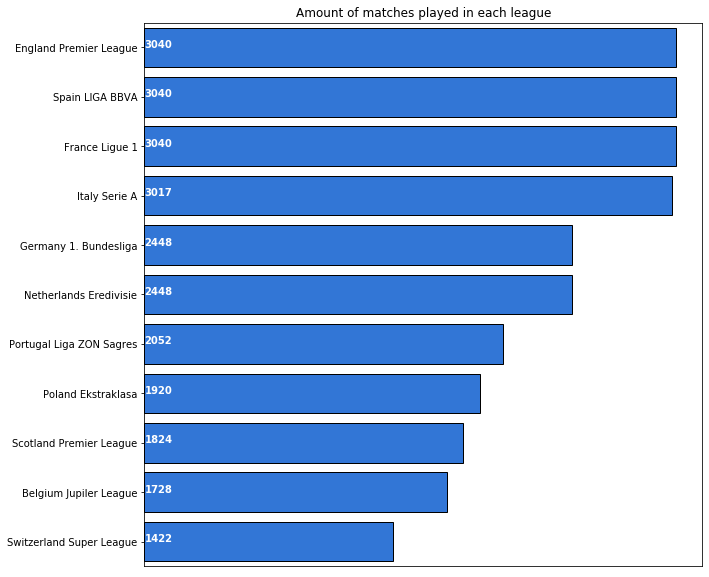

In [99]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1, color = "#1771F1",
                   edgecolor = "k"*data["league"].nunique()
                 )

for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.4,i,j,weight = "bold", color="white")

frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

plt.ylabel('')
plt.title("Amount of matches played in each league")
plt.show()

# Outcome probability of 26k matches played in every league

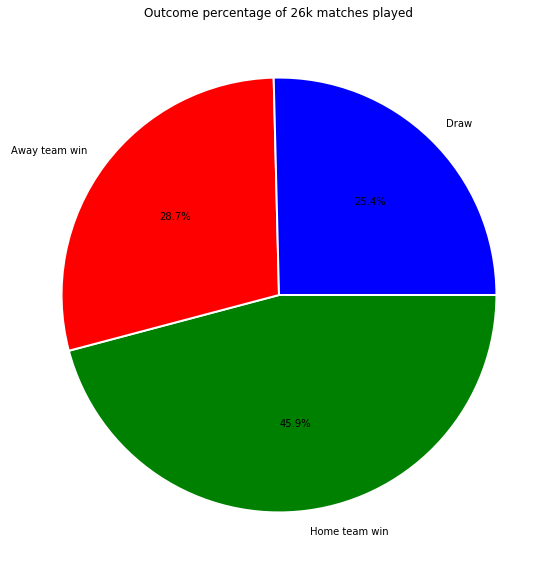

In [111]:
count = len(data["match_res"])

plt.figure(figsize=(10,10))
dp = data["match_res"].value_counts()

data["match_res"].value_counts().plot(kind = 'pie', counterclock = False, 
                                      autopct = "%1.1f%%",
                                      colors = ['green', 'red', 'blue'],
                                      wedgeprops = {"linewidth":2,"edgecolor":"white"})

plt.gca().axes.get_yaxis().set_visible(False)

plt.title('Outcome percentage of 26k matches played')
plt.show()

# Total number of goales scored by top30 team(home and away goals)

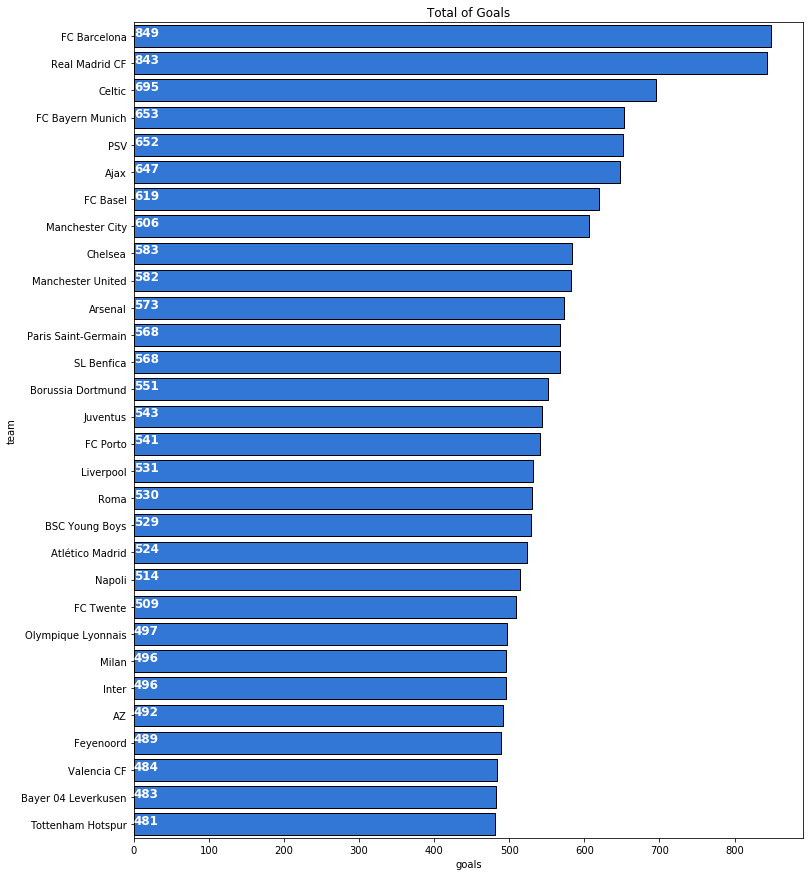

In [114]:
x = home_team
x = x.rename(columns={'home_team_lname':"team", 'home_team_goal':"goals"})
y = away_team
y = y.rename(columns={'away_team_lname':"team", 'away_team_goal':"goals"})

goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)

plt.figure(figsize=(12,15))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],color = '#1771F1',
                linewidth = 1,edgecolor = "k"*30)

for i,j in enumerate(goals["goals"][:30]):
        ax.text(.3,i,j,weight="bold",color = "white",fontsize =12)
    
plt.title("Total of Goals")
plt.show()

# Top 20 teams face-to-face meetings

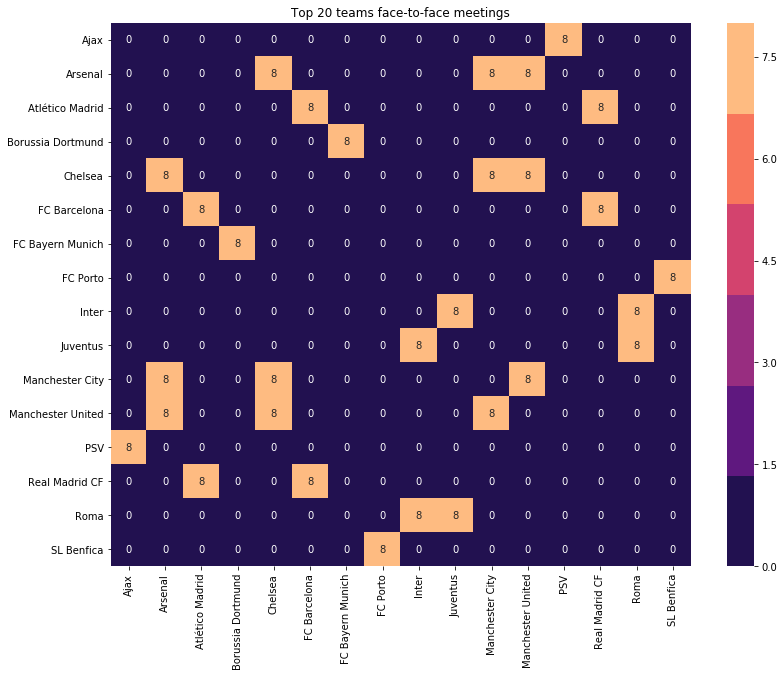

In [57]:
i = data["win"].value_counts()[1:20].index
c = data[(data["home_team_lname"].isin(i)) & (data["away_team_lname"].isin(i))]
d = pd.crosstab(c["home_team_lname"],c["away_team_lname"])

plt.figure(figsize=(13,10))
sns.heatmap(d,annot=True,cmap=sns.color_palette("magma"))

frame = plt.gca()
frame.xaxis.label.set_visible(False)
frame.yaxis.label.set_visible(False)

plt.title("Top 20 teams face-to-face meetings")
plt.show()

# Ronaldo vs Messi Goals over the last decade

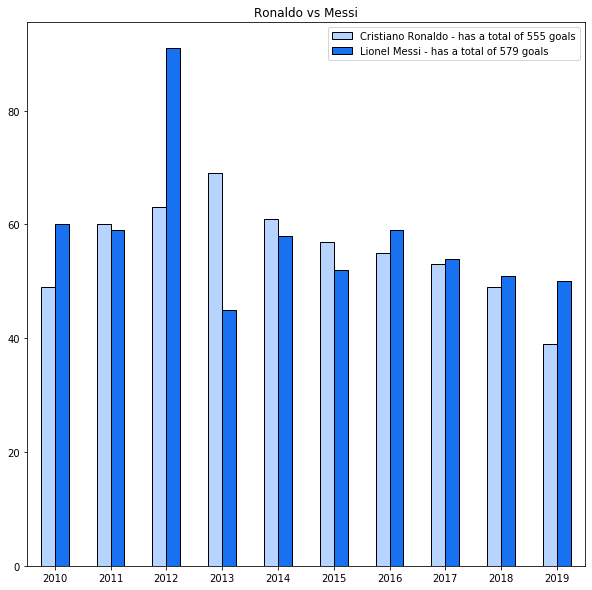

In [117]:
df.groupby("year").agg({"cr7":"sum","lm10":"sum"}).plot(kind="bar",
                                                        figsize = (10,10),
                                                        edgecolor = "k",
                                                        linewidth =1, color = ["#B7D4FF", '#1771F1'])

plt.xticks(rotation='horizontal')
plt.legend(loc = "best" , prop = {"size" : 20
                                 })

frame = plt.gca()
frame.xaxis.label.set_visible(False)

plt.title("Ronaldo vs Messi")
plt.legend(['Cristiano Ronaldo - has a total of 555 goals', 'Lionel Messi - has a total of 579 goals '])

plt.show()